<a href="https://colab.research.google.com/github/susmittha21/Sales_Analysis/blob/main/Simple_EDA_SALESdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SALES DATA EDA PROJECT


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
df = pd.read_csv('/content/Superstore.csv', encoding='latin1')


print(f"Dataset shape: {df.shape}")
print(df.info())

Dataset shape: (9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-nu

In [ ]:
print(df.head())

In [ ]:
df.isnull().sum() # ZERO FOR EVERYTGING AS NO NULL VALUES


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## FOR DATA CLEANING - NUMERIC DATA : CHECK FOR NEGATIVES , ZEROS , OUTLIERS , ANOMLIES

## DATA CONSISTENCY : SHIP DATE SHOULD BE AFTER ORDER DATE , SPACING ISSUES , INVALID POSTAL CODES (HERE)

#-IF MISSING VALUES PRESENT- Handle Missing Data
## Example: drop rows with any missing values
df = df.dropna() ......dropna(axis=1) -  COLUMNS NOT RECOMMENDED IF IMP VALUES R PRESENT

Updated_df = df.dropna(axis=0) - ROWS ARE DELETED

##Or you can fill missing data: IMPUTATIONS - MEAN , MEDIAN , MODE
Updated_df = Updated_df['columnname'].fillna(df['name'].mean())


df['Sales'] = df['Sales'].fillna(0)

#-Fix Data Types (especially dates)

In [ ]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [ ]:

# Convert to datetime (handles mixed formats automatically)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed')

# Convert to YYYY-MM-DD string format
df['Order Date'] = df['Order Date'].dt.strftime('%Y-%m-%d')
df['Ship Date'] = df['Ship Date'].dt.strftime('%Y-%m-%d')

In [ ]:
df['Order Date'].head(50)
#df['Order Date'].isnull().sum() - TO COUNT NULL VALUES IF ANY

,Order Date
0,2016-11-08
1,2016-11-08
2,2016-06-12
3,2015-10-11
4,2015-10-11
5,2014-06-09
6,2014-06-09
7,2014-06-09
8,2014-06-09
9,2014-06-09


In [ ]:
df['Ship Date'].head(15)

,Ship Date
0,2016-11-11
1,2016-11-11
2,2016-06-16
3,2015-10-18
4,2015-10-18
5,2014-06-14
6,2014-06-14
7,2014-06-14
8,2014-06-14
9,2014-06-14


In [ ]:
# Duplicate Rows
print(" DUPLICATE ROWS:")
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

 DUPLICATE ROWS:
Total duplicate rows: 0
UNIQUE VALUES (Categorical Columns):
Ship Mode: 4 unique values
  Values: ['Second Class', 'Standard Class', 'First Class', 'Same Day']

Segment: 3 unique values
  Values: ['Consumer', 'Corporate', 'Home Office']

Country: 1 unique values
  Values: ['United States']

Region: 4 unique values
  Values: ['South', 'West', 'Central', 'East']

Category: 3 unique values
  Values: ['Furniture', 'Office Supplies', 'Technology']

Sub-Category: 17 unique values
  Values: ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper', 'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines', 'Copiers']



In [ ]:
# Unique Values Check
print("UNIQUE VALUES (Categorical Columns):")
categorical_cols = ['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category']
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"  Values: {df[col].unique().tolist()}")
    print()

UNIQUE VALUES (Categorical Columns):
Ship Mode: 4 unique values
  Values: ['Second Class', 'Standard Class', 'First Class', 'Same Day']

Segment: 3 unique values
  Values: ['Consumer', 'Corporate', 'Home Office']

Country: 1 unique values
  Values: ['United States']

Region: 4 unique values
  Values: ['South', 'West', 'Central', 'East']

Category: 3 unique values
  Values: ['Furniture', 'Office Supplies', 'Technology']

Sub-Category: 17 unique values
  Values: ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper', 'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines', 'Copiers']



In [ ]:
# Checking numerical columns for anomalies

# Numerical Columns Analysis
print(" NUMERICAL COLUMNS - STATISTICS & ANOMALIES:")

numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print(df[col].describe())

    # Check for negative values
    if col in ['Sales', 'Quantity']:
        negatives = (df[col] < 0).sum()
        if negatives > 0:
            print(f"  WARNING: {negatives} negative values found!")

    # Check for zeros
    zeros = (df[col] == 0).sum()
    print(f"Zero values: {zeros} ({zeros/len(df)*100:.2f}%)")



 NUMERICAL COLUMNS - STATISTICS & ANOMALIES:

SALES:
count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64
Zero values: 0 (0.00%)

QUANTITY:
count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64
Zero values: 0 (0.00%)

DISCOUNT:
count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64
Zero values: 4798 (48.01%)

PROFIT:
count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64
Zero values: 65 (0.65%)


In [ ]:

# Data Consistency Checks
# Check if Ship Date is after Order Date
df_temp = df.copy()
df_temp['Order Date'] = pd.to_datetime(df_temp['Order Date'], format='mixed')
df_temp['Ship Date'] = pd.to_datetime(df_temp['Ship Date'], format='mixed')

invalid_dates = (df_temp['Ship Date'] < df_temp['Order Date']).sum()
print(f"\nShip dates before order dates: {invalid_dates}")

# Calculate shipping time
df_temp['Shipping_Days'] = (df_temp['Ship Date'] - df_temp['Order Date']).dt.days
print(f"\nShipping Time Statistics:")
print(df_temp['Shipping_Days'].describe())
print(f"Same day shipping: {(df_temp['Shipping_Days'] == 0).sum()} orders")



 DATA CONSISTENCY CHECKS:

Ship dates before order dates: 0

Shipping Time Statistics:
count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping_Days, dtype: float64
Same day shipping: 519 orders


In [ ]:
# Check for leading/trailing spaces
text_cols = ['Customer Name', 'City', 'State', 'Product Name']
for col in text_cols:
    spaces = (df[col].str.strip() != df[col]).sum()
    if spaces > 0:
        print(f"{col}: {spaces} entries with leading/trailing spaces")
    else:
        print(f"{col}: No spacing issues")

Customer Name: No spacing issues
City: No spacing issues
State: No spacing issues
Product Name: 16 entries with leading/trailing spaces


## CREATING CLEANED DATASET


Dates standardized to YYYY-MM-DD format

Product names trimmed (16 entries fixed)

Added 7 new derived columns:
  - Shipping_Days
  - Order_Year, Order_Month, Order_Quarter
  - Order_Day_of_Week")
  - Profit_Margin (%)
  - Is_Profitable (boolean)

In [7]:
# Creating cleaned dataset

df_cleaned = df.copy()

# Fix dates by converting to datetime objects
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], format='mixed')
df_cleaned['Ship Date'] = pd.to_datetime(df_cleaned['Ship Date'], format='mixed')

#  Strip whitespace from Product Name
df_cleaned['Product Name'] = df_cleaned['Product Name'].str.strip()

# Add useful derived columns (these require datetime objects)
df_cleaned['Shipping_Days'] = (df_cleaned['Ship Date'] - df_cleaned['Order Date']).dt.days
df_cleaned['Order_Year'] = df_cleaned['Order Date'].dt.year
df_cleaned['Order_Month'] = df_cleaned['Order Date'].dt.month
df_cleaned['Order_Quarter'] = df_cleaned['Order Date'].dt.quarter
df_cleaned['Order_Day_of_Week'] = df_cleaned['Order Date'].dt.day_name()
df_cleaned['Profit_Margin'] = (df_cleaned['Profit'] / df_cleaned['Sales']) * 100
df_cleaned['Is_Profitable'] = df_cleaned['Profit'] > 0

# Convert dates back to string for storage
df_cleaned['Order Date'] = df_cleaned['Order Date'].dt.strftime('%Y-%m-%d')
df_cleaned['Ship Date'] = df_cleaned['Ship Date'].dt.strftime('%Y-%m-%d')


In [ ]:
print(f"Final dataset shape: {df_cleaned.shape}")
print(f"Columns: {df_cleaned.shape[1]}")

Final dataset shape: (9994, 28)
Columns: 28


In [ ]:
df_cleaned.to_csv('/content/Superstore_FullyCleaned.csv.gz', index=False, compression='gzip')
print("\nCleaned dataset saved!")


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row ID             9994 non-null   int64  
 1   Order ID           9994 non-null   object 
 2   Order Date         9994 non-null   object 
 3   Ship Date          9994 non-null   object 
 4   Ship Mode          9994 non-null   object 
 5   Customer ID        9994 non-null   object 
 6   Customer Name      9994 non-null   object 
 7   Segment            9994 non-null   object 
 8   Country            9994 non-null   object 
 9   City               9994 non-null   object 
 10  State              9994 non-null   object 
 11  Postal Code        9994 non-null   int64  
 12  Region             9994 non-null   object 
 13  Product ID         9994 non-null   object 
 14  Category           9994 non-null   object 
 15  Sub-Category       9994 non-null   object 
 16  Product Name       9994 

In [ ]:
df_cleaned.describe().round(2)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping_Days,Order_Year,Order_Month,Order_Quarter,Profit_Margin
count,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,4997.50,55190.38,229.86,3.79,0.16,28.66,3.96,2015.72,7.81,2.88,12.03
std,2885.16,32063.69,623.25,2.23,0.21,234.26,1.75,1.12,3.28,1.06,46.68
min,1.00,1040.00,0.44,1.00,0.00,-6599.98,0.00,2014.00,1.00,1.00,-275.00
25%,2499.25,23223.00,17.28,2.00,0.00,1.73,3.00,2015.00,5.00,2.00,7.50
50%,4997.50,56430.50,54.49,3.00,0.20,8.67,4.00,2016.00,9.00,3.00,27.00
75%,7495.75,90008.00,209.94,5.00,0.20,29.36,5.00,2017.00,11.00,4.00,36.25
max,9994.00,99301.00,22638.48,14.00,0.80,8399.98,7.00,2017.00,12.00,4.00,50.00


In [ ]:
#  Basic aggregations and rankings

print("BASIC AGGREGATIONS & RANKINGS")



SECTION 1: BASIC AGGREGATIONS & RANKINGS

📊 Q1: Total Sales and Profit by Category
--------------------------------------------------------------------------------
                 Total_Sales  Total_Profit  Order_Count  Profit_Margin_%
Category                                                                
Technology         836154.03     145454.95         1847            17.40
Furniture          741999.80      18451.27         2121             2.49
Office Supplies    719047.03     122490.80         6026            17.04


📊 Q2: Top 10 Most Profitable Products
--------------------------------------------------------------------------------
                                                      Profit     Sales  \
Product Name                                                             
Canon imageCLASS 2200 Advanced Copier               25199.93  61599.82   
Fellowes PB500 Electric Punch Plastic Comb Bind...   7753.04  27453.38   
Hewlett Packard LaserJet 3310 Copier                 

In [ ]:
# 1: What are the total sales and profit by category
print("Total Sales and Profit by Category")
q1 = df_cleaned.groupby('Category').agg({'Sales': 'sum','Profit': 'sum','Order ID': 'count'}).round(2)
q1.columns = ['Total_Sales', 'Total_Profit', 'Order_Count']
q1['Profit_Margin_%'] = ((q1['Total_Profit'] / q1['Total_Sales']) * 100).round(2)
q1 = q1.sort_values('Total_Sales', ascending=False)
print(q1)

Total Sales and Profit by Category
                 Total_Sales  Total_Profit  Order_Count  Profit_Margin_%
Category                                                                
Technology         836154.03     145454.95         1847            17.40
Furniture          741999.80      18451.27         2121             2.49
Office Supplies    719047.03     122490.80         6026            17.04


In [ ]:
# 2: Top 10 most profitable products
print(" Top 10 Most Profitable Products")
q2 = df_cleaned.groupby('Product Name').agg({'Profit': 'sum','Sales': 'sum','Quantity': 'sum'}).round(2)
q2 = q2.sort_values('Profit', ascending=False).head(10)
print(q2)

 Top 10 Most Profitable Products
                                                      Profit     Sales  \
Product Name                                                             
Canon imageCLASS 2200 Advanced Copier               25199.93  61599.82   
Fellowes PB500 Electric Punch Plastic Comb Bind...   7753.04  27453.38   
Hewlett Packard LaserJet 3310 Copier                 6983.88  18839.69   
Canon PC1060 Personal Laser Copier                   4570.93  11619.83   
HP Designjet T520 Inkjet Large Format Printer -...   4094.98  18374.90   
Ativa V4110MDD Micro-Cut Shredder                    3772.95   7699.89   
3D Systems Cube Printer, 2nd Generation, Magenta     3717.97  14299.89   
Plantronics Savi W720 Multi-Device Wireless Hea...   3696.28   9367.29   
Ibico EPK-21 Electric Binding System                 3345.28  15875.92   
Zebra ZM400 Thermal Label Printer                    3343.54   6965.70   

                                                    Quantity  
Product Name   

In [ ]:
# 3: Top 10 loss-making products
print(" Top 10 Loss-Making Products (Worst Performers)")
q3 = df_cleaned.groupby('Product Name').agg({'Profit': 'sum','Sales': 'sum','Quantity': 'sum'}).round(2)
q3 = q3.sort_values('Profit', ascending=True).head(10)
print(q3)

 Top 10 Loss-Making Products (Worst Performers)
                                                     Profit     Sales  \
Product Name                                                            
Cubify CubeX 3D Printer Double Head Print          -8879.97  11099.96   
Lexmark MX611dhe Monochrome Laser Printer          -4589.97  16829.90   
Cubify CubeX 3D Printer Triple Head Print          -3839.99   7999.98   
Chromcraft Bull-Nose Wood Oval Conference Table... -2876.12   9917.64   
Bush Advantage Collection Racetrack Conference ... -1934.40   9544.72   
GBC DocuBind P400 Electric Binding System          -1878.17  17965.07   
Cisco TelePresence System EX90 Videoconferencin... -1811.08  22638.48   
Martin Yale Chadless Opener Electric Letter Opener -1299.18  16656.20   
Balt Solid Wood Round Tables                       -1201.06   6518.75   
BoxOffice By Design Rectangular and Half-Moon M... -1148.44   1706.25   

                                                    Quantity  
Product Name

In [ ]:
# 4: Sales performance by region
print("  Sales Performance by Region")
q4 = df_cleaned.groupby('Region').agg({'Sales': 'sum','Profit': 'sum','Order ID': 'count'}).round(2)
q4.columns = ['Total_Sales', 'Total_Profit', 'Order_Count']
q4['Avg_Order_Value'] = (q4['Total_Sales'] / q4['Order_Count']).round(2)
q4 = q4.sort_values('Total_Sales', ascending=False)
print(q4)



  Sales Performance by Region
         Total_Sales  Total_Profit  Order_Count  Avg_Order_Value
Region                                                          
West       725457.82     108418.45         3203           226.49
East       678781.24      91522.78         2848           238.34
Central    501239.89      39706.36         2323           215.77
South      391721.90      46749.43         1620           241.80


In [21]:
#  Monthly sales trend
print("Monthly Sales Trend (2014-2017)")

# Fix: Use df_cleaned['Order Date'] which is already a datetime type
df_cleaned['Year_Month'] = df_cleaned['Order Date'].dt.to_period('M')
q6 = df_cleaned.groupby('Year_Month').agg({'Sales': 'sum','Profit': 'sum','Order ID': 'count'}).round(2)
q6.columns = ['Total_Sales', 'Total_Profit', 'Order_Count']
print(q6.tail(12))  # Last 12 months

Monthly Sales Trend (2014-2017)
            Total_Sales  Total_Profit  Order_Count
Year_Month                                        
2017-01        43971.37       7140.44          155
2017-02        20301.13       1613.87          107
2017-03        58872.35      14751.89          238
2017-04        36521.54        933.29          203
2017-05        44261.11       6342.58          242
2017-06        52981.73       8223.34          245
2017-07        45264.42       6952.62          226
2017-08        63120.89       9040.96          218
2017-09        87866.65      10991.56          459
2017-10        77776.92       9275.28          298
2017-11       118447.82       9690.10          459
2017-12        83829.32       8483.35          462


 Category Sales & Profit Analysis
          Category        Sales       Profit
0        Furniture  741999.7953   18451.2728
1  Office Supplies  719047.0320  122490.8008
2       Technology  836154.0330  145454.9481


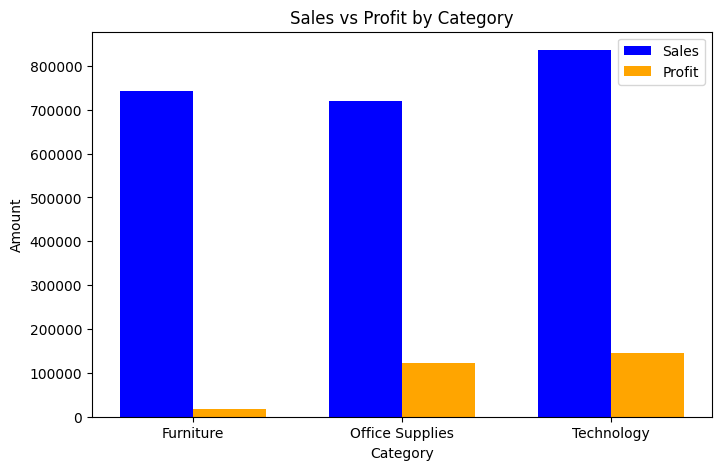


Highest sales: Technology = 836154


In [19]:
#  Bar Chart - Sales & Profit by Category
print(" Category Sales & Profit Analysis")

# Calculate totals
category_data = df_cleaned.groupby('Category').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
print(category_data)

# Simple bar chart
plt.figure(figsize=(8,5))
x = range(len(category_data))
width = 0.35

plt.bar([i - width/2 for i in x], category_data['Sales'], width, label='Sales', color='blue')
plt.bar([i + width/2 for i in x], category_data['Profit'], width, label='Profit', color='orange')

plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Sales vs Profit by Category')
plt.xticks(x, category_data['Category'])
plt.legend()
plt.show()

#  which is highest
highest_sales = category_data.loc[category_data['Sales'].idxmax()]
print(f"\nHighest sales: {highest_sales['Category']} = {highest_sales['Sales']:.0f}")


 Monthly Sales Trend


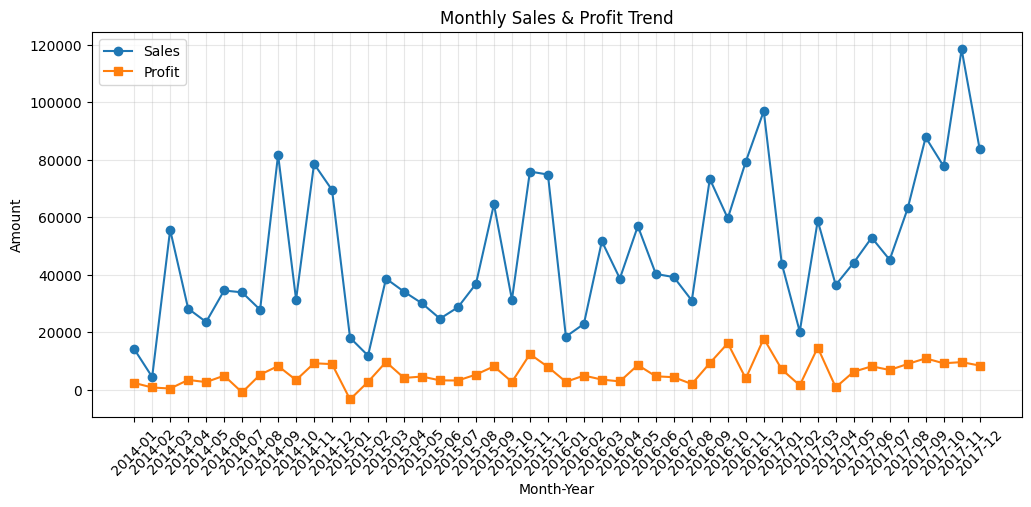

Data from 2014-01 to 2017-12


In [11]:
#  Line Chart - Monthly Sales Trend
print(" Monthly Sales Trend")

df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], format='%Y-%m-%d')

# Group by month using df_cleaned
df_cleaned['YearMonth'] = df_cleaned['Order Date'].dt.strftime('%Y-%m')
monthly_data = df_cleaned.groupby('YearMonth').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()

#line chart
plt.figure(figsize=(12,5))
plt.plot(monthly_data['YearMonth'], monthly_data['Sales'], marker='o', label='Sales')
plt.plot(monthly_data['YearMonth'], monthly_data['Profit'], marker='s', label='Profit')

plt.xlabel('Month-Year')
plt.ylabel('Amount')
plt.title('Monthly Sales & Profit Trend')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Data from {monthly_data['YearMonth'].iloc[0]} to {monthly_data['YearMonth'].iloc[-1]}")

 Regional Sales Distribution


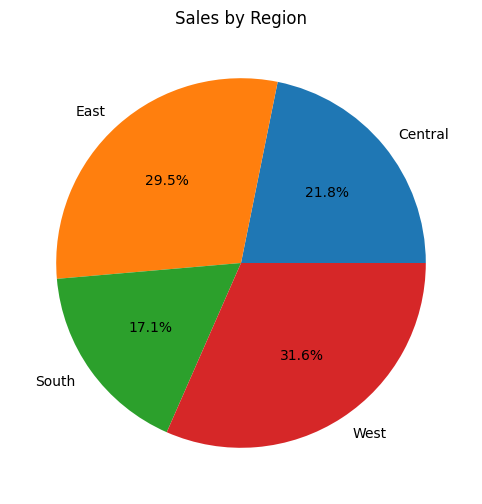

Central: 501240 (21.8%)
East: 678781 (29.5%)
South: 391722 (17.1%)
West: 725458 (31.6%)


In [13]:
#  Pie Chart - Regional Sales Distribution
print(" Regional Sales Distribution")

# Calculate regional sales
region_data = df_cleaned.groupby('Region')['Sales'].sum().reset_index()

# Simple pie chart
plt.figure(figsize=(8,6))
plt.pie(region_data['Sales'], labels=region_data['Region'], autopct='%1.1f%%')
plt.title('Sales by Region')
plt.show()

#  numbers
for index, row in region_data.iterrows():
    print(f"{row['Region']}: {row['Sales']:.0f} ({row['Sales']/region_data['Sales'].sum()*100:.1f}%)")

Top 10 Sub-Categories by Profit


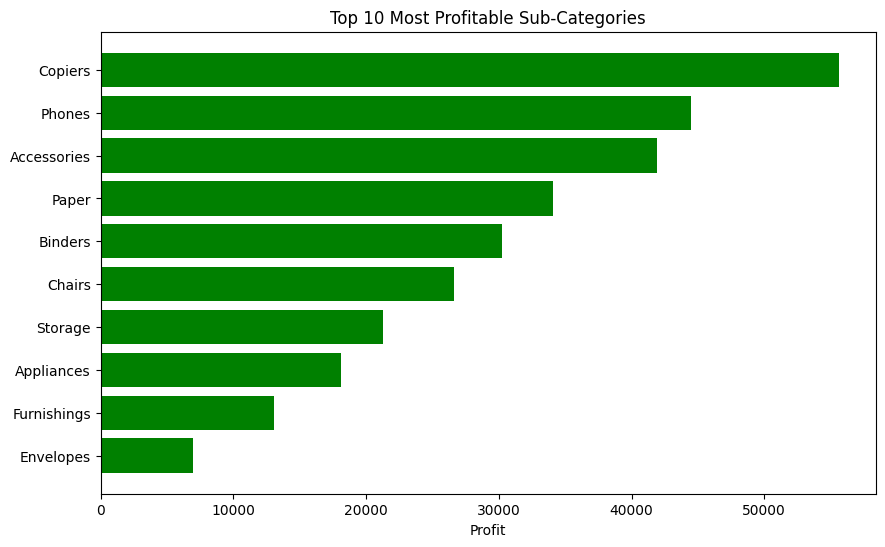

Top 3 most profitable:
  1. Accessories: 41937
  2. Phones: 44516
  3. Copiers: 55618


In [14]:
#  Horizontal Bar - Top 10 Sub-Categories
print("Top 10 Sub-Categories by Profit")

# top 10 profitable sub-categories
subcat_data = df_cleaned.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=True).tail(10)

# Simple horizontal bar
plt.figure(figsize=(10,6))
plt.barh(subcat_data.index, subcat_data.values, color='green')
plt.xlabel('Profit')
plt.title('Top 10 Most Profitable Sub-Categories')
plt.show()

#  top 3
print("Top 3 most profitable:")
for i, (subcat, profit) in enumerate(subcat_data.tail(3).items()):
    print(f"  {i+1}. {subcat}: {profit:.0f}")